# IMPORTING ALL NECESSARY PACKAGES 

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from pandas_profiling import ProfileReport
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
import numpy as np

#importing models

import xgboost as xgb
from xgboost import plot_tree
import lightgbm as lgb
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#importing visualization packages 

import matplotlib.pyplot as plt
import seaborn as sns
pd.describe_option("use_inf_as_null")

mode.use_inf_as_null : boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.
    [default: False] [currently: False]
    (Deprecated, use `mode.use_inf_as_na` instead.)


# Reading data from CSV

In [4]:
df = pd.read_csv("house-prices-advanced-regression-techniques/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques/test.csv")
categorical_cols = test.select_dtypes(include="object").columns
numerical_cols = test.select_dtypes(exclude="object").columns
df[numerical_cols]

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010


# Label Encoding the categorical values

In [6]:
classes = {}
le = LabelEncoder()
number =[]
for i in test.columns:
    if(df[i].dtype=="object"):
        df[i] = df[i].fillna("NA")
        test[i] = test[i].fillna("NA")
        le.fit(np.unique(np.concatenate((test[i].unique(),df[i].unique()))))
        classes[i]=le.classes_
        df[i]=le.transform(df[[i]])
        test[i]=le.transform(test[[i]])
    else:
        number.append(i)

/home/tennyson/.local/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
# le = LabelEncoder()
# le.fit(df["YrSold"].unique())
# classes[i]=le.classes_
# df["YrSold"]=le.transform(df["YrSold"])

# Finding missing values in train

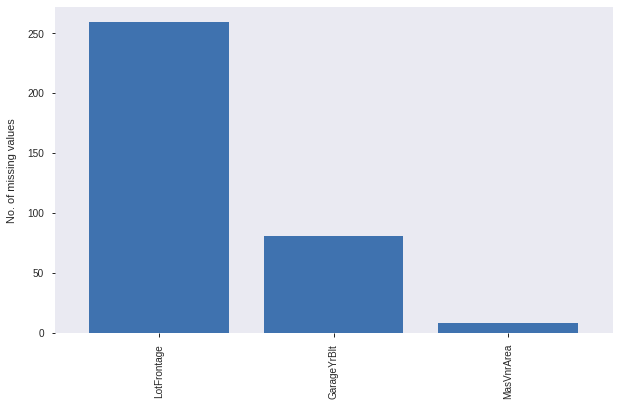

In [8]:
nans = df.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

# Finding missing values in test set

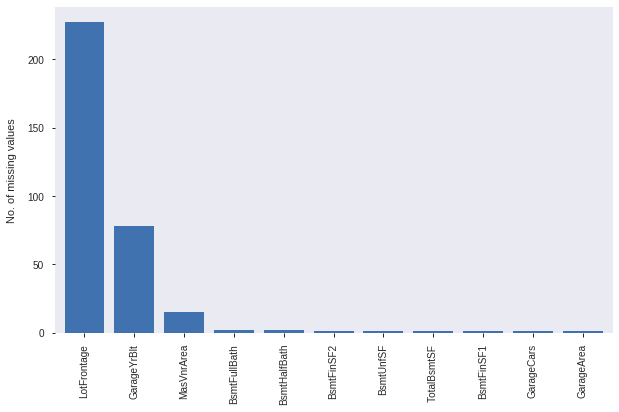

In [9]:
nans = test.isna().sum().sort_values(ascending=False)
nans = nans[nans > 0]
fig, ax = plt.subplots(figsize=(10, 6))
ax.grid()
ax.bar(nans.index, nans.values, zorder=2, color="#3f72af")
ax.set_ylabel("No. of missing values", labelpad=10)
ax.set_xlim(-0.6, len(nans) - 0.4)
ax.xaxis.set_tick_params(rotation=90)
plt.show()

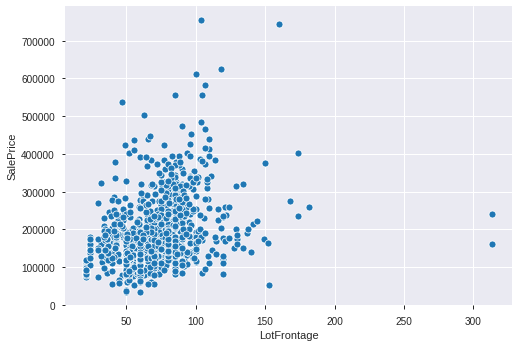

In [10]:
sns.scatterplot(df["LotFrontage"],df["SalePrice"])

# Removing outliers from scatterplot

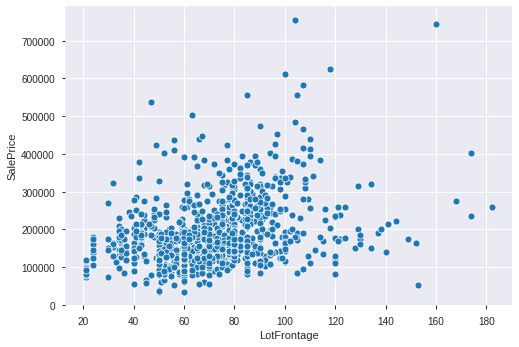

In [21]:
df = df.drop(df[df.LotFrontage>250].index)
df =  df[df.LotArea<100000]
sns.scatterplot(df["LotFrontage"],df["SalePrice"])

# Splitting train and test set

In [ ]:
y = df["SalePrice"]
X = df.drop(["Id","SalePrice"],axis =1 )

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Lightgbm Regressor Model

In [15]:
lgbreg = lgb.LGBMRegressor(random_state = 1)
lgbreg.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(lgbreg.score(X_train,y_train)))
print("R-Squared on test dataset={}".format(lgbreg.score(X_test,y_test)))

R-Squared on train dataset=0.9751965403698095
R-Squared on test dataset=0.9064094562711326


# XGBoost Regressor Model

In [16]:
xgbr = XGBRegressor(random_state = 1)
xgbr.fit(X_train,y_train)
print("R-Squared on train dataset={}".format(xgbr.score(X_train,y_train)))
print("R-Squared on test dataset={}".format(xgbr.score(X_test,y_test)))

[11:25:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R-Squared on train dataset=0.967500978252287
R-Squared on test dataset=0.9138298654862369


# Sample Submission

In [18]:
Test_X = test.drop(["Id"], axis=1)    #dropping id to pass into model
Test_X["SalePrice"]=lgbreg.predict(Test_X)    #predicting the SalesPrice using LightGbm Regressor
Test_X["Id"]=test["Id"]

In [19]:
Test_X[["Id","SalePrice"]].to_csv('output.csv',header=True,sep=',',index=False)    #output to 'output.csv'

In [20]:
df.Id.dtypes

dtype('int64')